<a href="https://colab.research.google.com/github/DucLeTrong/pytorch_review/blob/master/7_mnist_nn_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [0]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


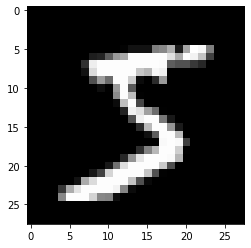

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [0]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape


In [0]:
import math 
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(784,10) /math.sqrt(784))
        self.bias = torch.nn.Parameter(torch.zeros(10))
    def forward(self, xb):
        return log_softmax(xb @ self.weights + self.bias) 

In [0]:
model = MyModel()

In [0]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [0]:
def nll(input, target):
    # print(input[range(target.shape[0])])
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [0]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [0]:
from IPython.core.debugger import set_trace
bs = 64
lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

n, c = x_train.shape

In [0]:
def fit():
    for epoch in range(epochs):
        for i in range((n-1)//bs + 1):
            start_i = i*bs
            end_i = start_i + bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)

            loss = loss_func(pred,yb)
            print(i, loss)
            loss.backward()
            with torch.no_grad():
                for parameter in model.parameters():
                    parameter -= parameter.grad * lr
                model.zero_grad()

In [17]:
fit()

0 tensor(2.3906, grad_fn=<NegBackward>)
1 tensor(1.8071, grad_fn=<NegBackward>)
2 tensor(1.8196, grad_fn=<NegBackward>)
3 tensor(1.5746, grad_fn=<NegBackward>)
4 tensor(1.2875, grad_fn=<NegBackward>)
5 tensor(0.9809, grad_fn=<NegBackward>)
6 tensor(0.9135, grad_fn=<NegBackward>)
7 tensor(1.0545, grad_fn=<NegBackward>)
8 tensor(0.9469, grad_fn=<NegBackward>)
9 tensor(1.1363, grad_fn=<NegBackward>)
10 tensor(0.9430, grad_fn=<NegBackward>)
11 tensor(0.9830, grad_fn=<NegBackward>)
12 tensor(0.8125, grad_fn=<NegBackward>)
13 tensor(0.9414, grad_fn=<NegBackward>)
14 tensor(1.0678, grad_fn=<NegBackward>)
15 tensor(0.7524, grad_fn=<NegBackward>)
16 tensor(0.9703, grad_fn=<NegBackward>)
17 tensor(0.9397, grad_fn=<NegBackward>)
18 tensor(0.5276, grad_fn=<NegBackward>)
19 tensor(0.6482, grad_fn=<NegBackward>)
20 tensor(0.6716, grad_fn=<NegBackward>)
21 tensor(1.0270, grad_fn=<NegBackward>)
22 tensor(1.0788, grad_fn=<NegBackward>)
23 tensor(0.9034, grad_fn=<NegBackward>)
24 tensor(0.5058, grad_fn=